##### LRG has some measurement bias on legacysurvey. My current guess of this indiscrepency is that the color distribution of LRGs is making this process having bias on error estimate. To test on this, I'm going to make 5 representitive points on LRG and and see if these 5 points provides similar bias as I see when populating the whole LRG sample. 

##### step 1: grab the photometric LRG sample from Ashley's sample

In [14]:
%matplotlib inline
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
fn = '/global/cscratch1/sd/ajross/tarcat/vtest/tv0.50.0/LRG_IRsv1targetsDR9v0.50.0_masked.fits'

In [15]:
LRG = fits.getdata(fn)

In [16]:
from tools import *

In [17]:
mag_g = flux2mag(LRG['flux_g'],LRG['mw_transmission_g'])
mag_r = flux2mag(LRG['flux_r'],LRG['mw_transmission_r'])
mag_z = flux2mag(LRG['flux_z'],LRG['mw_transmission_z'])
mag_w1 = flux2mag(LRG['flux_w1'],LRG['mw_transmission_w1'])

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: divide by zero encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


In [18]:
faint_cut = (mag_g>14)&(mag_r>14)&(mag_z>14)&(mag_r<30)&(mag_z<30)&(mag_g<30)&(mag_w1>14)&(mag_w1<30)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [19]:
faint_cut.sum()/len(faint_cut)

0.99685631661776875

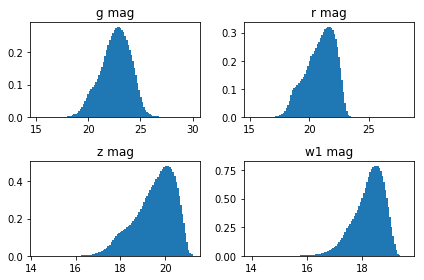

In [20]:
plt.subplot(2,2,1)
p=plt.hist(mag_g[faint_cut],bins=100,density=True)
plt.title('g mag')

plt.subplot(2,2,2)
p=plt.hist(mag_r[faint_cut],bins=100,density=True)
plt.title('r mag')

plt.subplot(2,2,3)
p=plt.hist(mag_z[faint_cut],bins=100,density=True)
plt.title('z mag')

plt.subplot(2,2,4)
p=plt.hist(mag_w1[faint_cut],bins=100,density=True)
plt.title('w1 mag')

plt.tight_layout()

#### too big for kde, I need to cut to a smaller set

In [21]:
samp_g = mag_g[faint_cut][::1000]
samp_r = mag_r[faint_cut][::1000]
samp_z = mag_z[faint_cut][::1000]
samp_w1 = mag_w1[faint_cut][::1000]

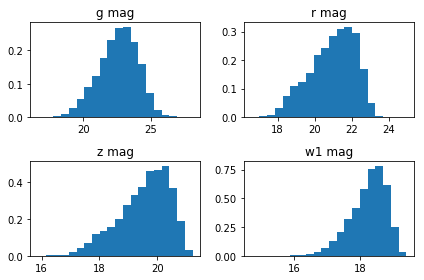

In [22]:
plt.subplot(2,2,1)
p=plt.hist(samp_g,bins=20,density=True)
plt.title('g mag')

plt.subplot(2,2,2)
p=plt.hist(samp_r,bins=20,density=True)
plt.title('r mag')

plt.subplot(2,2,3)
p=plt.hist(samp_z,bins=20,density=True)
plt.title('z mag')

plt.subplot(2,2,4)
p=plt.hist(samp_w1,bins=20,density=True)
plt.title('w1 mag')

plt.tight_layout()

In [23]:
gmax = samp_g.max()
gmin = samp_g.min()

rmax = samp_r.max()
rmin = samp_r.min()

zmax = samp_z.max()
zmin = samp_z.min()

w1max = samp_w1.max()
w1min = samp_w1.min()

In [24]:
gbins = np.mgrid[gmin:gmax:21j]
rbins = np.mgrid[rmin:rmax:21j]
zbins = np.mgrid[zmin:zmax:21j]
density = np.zeros([20,20,20])

In [25]:
for i in range(20):
    for  j in range(20):
        for k in range(20):
            g_left = gbins[i]
            g_right = gbins[i+1]
            r_left = rbins[j]
            r_right = rbins[j+1]
            z_left = zbins[k]
            z_right = zbins[k+1]
            sel = (samp_g>g_left)&(samp_g<g_right)&(samp_r>r_left)&(samp_r<r_right)&(samp_z>z_left)&(samp_z<z_right)
            density[i][j][k]+=sel.sum()

In [26]:
np.where(density==density.max())

(array([11]), array([11]), array([14]))

In [27]:
density.max()

395.0

In [28]:
high_dens_cells = np.where(density>190)

In [29]:
len(high_dens_cells[0])

14

#### maximum density cell for LRGs

(gbins[11]+gbins[12])/2.,(rbins[11]+rbins[12])/2.,(zbins[14]+zbins[15])/2.

#### a few (14) high density cells

In [30]:
g_cells = np.zeros(14)
r_cells = np.zeros(14)
z_cells = np.zeros(14)
for i in range(14):
    g_i = high_dens_cells[0][i]
    g_cells[i] = (gbins[g_i]+gbins[g_i+1])/2.
    
    r_i = high_dens_cells[1][i]
    r_cells[i] = (rbins[r_i]+rbins[r_i+1])/2.
    
    z_i = high_dens_cells[2][i]
    z_cells[i] = (zbins[z_i]+zbins[z_i+1])/2.

In [31]:
g_cells

array([ 20.94301915,  21.51687846,  22.09073777,  22.09073777,
        22.66459708,  22.66459708,  22.66459708,  23.23845639,
        23.23845639,  23.23845639,  23.8123157 ,  23.8123157 ,
        23.8123157 ,  24.38617501])

In [32]:
r_cells

array([ 19.306463  ,  19.7237618 ,  20.14106059,  20.55835938,
        20.55835938,  20.97565818,  20.97565818,  21.39295697,
        21.39295697,  21.81025577,  21.81025577,  21.81025577,
        22.22755456,  22.22755456])

In [33]:
z_cells

array([ 18.41237838,  18.68033307,  18.94828775,  19.21624243,
        19.21624243,  19.48419712,  19.7521518 ,  19.7521518 ,
        20.02010648,  20.28806117,  20.02010648,  20.28806117,
        20.28806117,  20.28806117])

In [34]:
rhalf = np.clip(np.abs(np.random.normal(0,0.4,14)),0,3)

In [35]:
rhalf

array([ 0.4124491 ,  0.12557291,  0.60714328,  0.00138882,  0.29434279,
        0.050395  ,  0.20578098,  0.05266723,  0.56841349,  0.25742532,
        0.40990624,  0.5292394 ,  0.96595342,  0.03459678])

In [36]:
redshfit = np.clip(np.abs(np.random.normal(0,1,14)),0,3) #not important

In [240]:
from astropy.table import Table
t = Table()
t['g'] = g_cells
t['r'] = r_cells
t['z'] = z_cells
t['w1'] = np.ones(14)*19.5
t['w2'] = np.ones(14)*19.5
t['n'] = np.ones(14)
t['hsc_mizuki_photoz_best'] = redshfit
t['rhalf'] = rhalf

In [241]:
t.write('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/lrg_representitve/seed.fits',overwrite=True)

#### next I make a run called lrg_representitve, to run only on these 14 sources

In [37]:
fn = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/lrg_representitve/subset/sim_lrg_representitve.fits'
lrg_representitve = fits.getdata(fn)
lrg_representitve = lrg_representitve[lrg_representitve['detected']&(lrg_representitve['maskbits']==0)]

g flux mean: -0.011
r flux mean: -0.056
z flux mean: -0.264


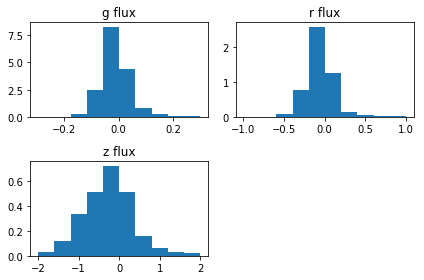

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.title('g flux')
sel = (lrg_representitve['flux_g']>0)&(lrg_representitve['flux_g']<20)&(np.abs(lrg_representitve['flux_g']-lrg_representitve['sim_gflux'])<0.3)
p=plt.hist(lrg_representitve[sel]['flux_g']-lrg_representitve[sel]['sim_gflux'],density=True)
print("g flux mean: %.3f" %((lrg_representitve[sel]['flux_g']-lrg_representitve[sel]['sim_gflux']).mean()))
plt.subplot(2,2,2)
plt.title('r flux')
sel = (lrg_representitve['flux_r']>0)&(lrg_representitve['flux_r']<40)&(np.abs(lrg_representitve['flux_r']-lrg_representitve['sim_rflux'])<1)
p=plt.hist(lrg_representitve[sel]['flux_r']-lrg_representitve[sel]['sim_rflux'],density=True)
print("r flux mean: %.3f" %((lrg_representitve[sel]['flux_r']-lrg_representitve[sel]['sim_rflux']).mean()))

plt.subplot(2,2,3)
plt.title('z flux')
sel = (lrg_representitve['flux_z']>0)&(lrg_representitve['flux_z']<50)&(np.abs(lrg_representitve['flux_z']-lrg_representitve['sim_zflux'])<2)
p=plt.hist(lrg_representitve[sel]['flux_z']-lrg_representitve[sel]['sim_zflux'],density=True)
print("z flux mean: %.3f" %((lrg_representitve[sel]['flux_z']-lrg_representitve[sel]['sim_zflux']).mean()))

plt.tight_layout()


g mean: -0.453
g std: 2.075
r mean: -1.208
r std: 3.689
z mean: -2.576
z std: 5.527


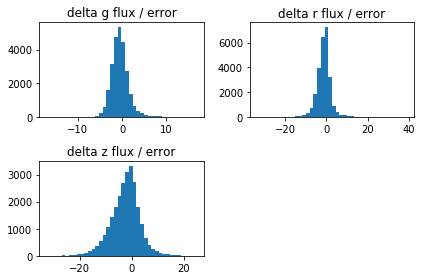

In [39]:
plt.subplot(2,2,1)
plt.title('delta g flux / error')
sel = (lrg_representitve['flux_g']>0)&(lrg_representitve['flux_g']<20)&(np.abs(lrg_representitve['flux_g']-lrg_representitve['sim_gflux'])<0.3)
x = (lrg_representitve[sel]['flux_g']-lrg_representitve[sel]['sim_gflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_g'])
p=plt.hist(x,bins=40)
print('g mean: %.3f'%x.mean())
print('g std: %.3f'%x.std())

plt.subplot(2,2,2)
plt.title('delta r flux / error')
sel = (lrg_representitve['flux_r']>0)&(lrg_representitve['flux_r']<40)&(np.abs(lrg_representitve['flux_r']-lrg_representitve['sim_rflux'])<1)
x=(lrg_representitve[sel]['flux_r']-lrg_representitve[sel]['sim_rflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_r'])
p=plt.hist(x,bins=40)
print('r mean: %.3f'%x.mean())
print('r std: %.3f'%x.std())

plt.subplot(2,2,3)
plt.title('delta z flux / error')
sel = (lrg_representitve['flux_z']>0)&(lrg_representitve['flux_z']<50)&(np.abs(lrg_representitve['flux_z']-lrg_representitve['sim_zflux'])<2)
x=(lrg_representitve[sel]['flux_z']-lrg_representitve[sel]['sim_zflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_z'])
p=plt.hist(x,bins=40)
print('z mean: %.3f'%x.mean())
print('z std: %.3f'%x.std())


plt.tight_layout()

g mean: -0.177
g std: 1.944
r mean: -0.554
r std: 3.079
z mean: -1.039
z std: 5.327


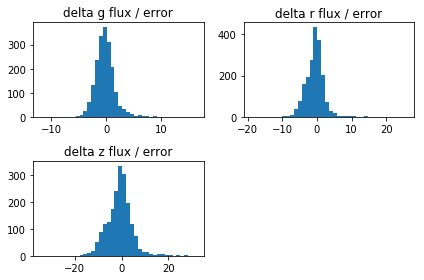

In [40]:
id_sample = 7
#relatively bright end

plt.subplot(2,2,1)
plt.title('delta g flux / error')
sel = (lrg_representitve['flux_g']>0)&(lrg_representitve['flux_g']<20)&(np.abs(lrg_representitve['flux_g']-lrg_representitve['sim_gflux'])<0.3)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x = (lrg_representitve[sel]['flux_g']-lrg_representitve[sel]['sim_gflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_g'])
p=plt.hist(x,bins=40)
print('g mean: %.3f'%x.mean())
print('g std: %.3f'%x.std())

plt.subplot(2,2,2)
plt.title('delta r flux / error')
sel = (lrg_representitve['flux_r']>0)&(lrg_representitve['flux_r']<40)&(np.abs(lrg_representitve['flux_r']-lrg_representitve['sim_rflux'])<1)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x=(lrg_representitve[sel]['flux_r']-lrg_representitve[sel]['sim_rflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_r'])
p=plt.hist(x,bins=40)
print('r mean: %.3f'%x.mean())
print('r std: %.3f'%x.std())

plt.subplot(2,2,3)
plt.title('delta z flux / error')
sel = (lrg_representitve['flux_z']>0)&(lrg_representitve['flux_z']<50)&(np.abs(lrg_representitve['flux_z']-lrg_representitve['sim_zflux'])<4)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x=(lrg_representitve[sel]['flux_z']-lrg_representitve[sel]['sim_zflux'])*np.sqrt(lrg_representitve[sel]['flux_ivar_z'])
p=plt.hist(x,bins=40)
print('z mean: %.3f'%x.mean())
print('z std: %.3f'%x.std())


plt.tight_layout()


g mean: -0.060
g std: 0.050
r mean: -0.305
r std: 0.140
z mean: -1.155
z std: 0.571


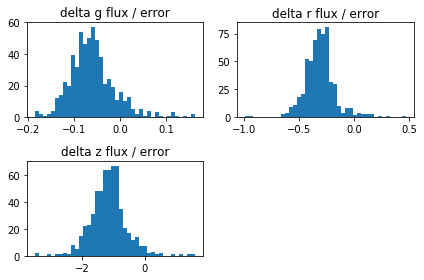

In [72]:
id_sample = 0
#relatively bright end

plt.subplot(2,2,1)
plt.title('delta g flux / error')
sel = (lrg_representitve['flux_g']>0)&(lrg_representitve['flux_g']<20)&(np.abs(lrg_representitve['flux_g']-lrg_representitve['sim_gflux'])<0.3)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x = (lrg_representitve[sel]['flux_g']-lrg_representitve[sel]['sim_gflux'])
p=plt.hist(x,bins=40)
print('g mean: %.3f'%x.mean())
print('g std: %.3f'%x.std())

plt.subplot(2,2,2)
plt.title('delta r flux / error')
sel = (lrg_representitve['flux_r']>0)&(lrg_representitve['flux_r']<40)&(np.abs(lrg_representitve['flux_r']-lrg_representitve['sim_rflux'])<1)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x=(lrg_representitve[sel]['flux_r']-lrg_representitve[sel]['sim_rflux'])
p=plt.hist(x,bins=40)
print('r mean: %.3f'%x.mean())
print('r std: %.3f'%x.std())

plt.subplot(2,2,3)
plt.title('delta z flux / error')
sel = (lrg_representitve['flux_z']>0)&(lrg_representitve['flux_z']<50)&(np.abs(lrg_representitve['flux_z']-lrg_representitve['sim_zflux'])<4)
sel2 = (lrg_representitve['id_sample']==id_sample)
sel = sel&sel2
x=(lrg_representitve[sel]['flux_z']-lrg_representitve[sel]['sim_zflux'])
p=plt.hist(x,bins=40)
print('z mean: %.3f'%x.mean())
print('z std: %.3f'%x.std())


plt.tight_layout()


#### here's LRG south selected using isLRG code

In [2]:
fn = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_code/obiwan_dr9m/etc/LRG_south.fits'
dat = fits.getdata(fn)


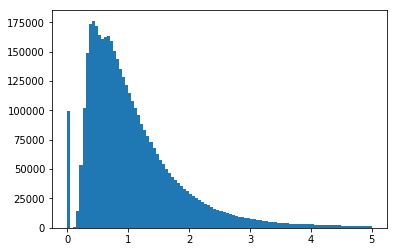

In [9]:
sel = (dat['SHAPE_R']<5)
p=plt.hist(dat[sel]['SHAPE_R'],bins=100)

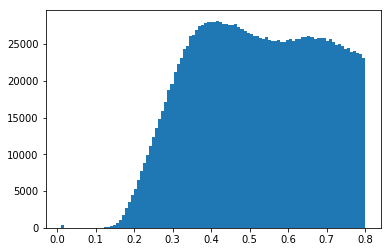

In [12]:
sel = (dat['SHAPE_R']<0.8)&(dat['SHAPE_R']>0)
p=plt.hist(dat[sel]['SHAPE_R'],bins=100)

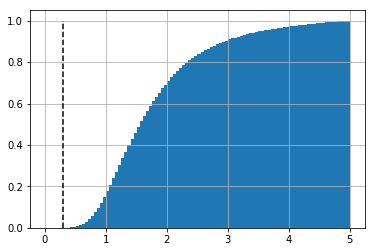

In [63]:
sel = (dat['SHAPE_R']<5)
sel2=(dat['TYPE']=='SER')
p=plt.hist(dat[sel&sel2]['SHAPE_R'],bins=100,cumulative=True,density=True)
plt.plot([0.3,0.3],[0,1],'k--')
plt.grid(which='both')

In [81]:
minr=np.log(0.1)
maxr=np.log(5)
rs = [np.exp(i*(maxr-minr)/100+minr) for i in range(100)]

In [83]:
rs

[0.10000000000000002,
 0.10398955028272282,
 0.10813826568002935,
 0.11245249616419849,
 0.11693884504284612,
 0.12160417906586575,
 0.12645563893559073,
 0.1315006502362645,
 0.13674693479954772,
 0.14220252252345783,
 0.14787576366283139,
 0.15377534161012038,
 0.15991028618608488,
 0.16628998746072465,
 0.17292421012560369,
 0.17982310843956589,
 0.1869972417707175,
 0.194457590758465,
 0.20221557412034533,
 0.21028306612937303,
 0.21867241478865565,
 0.22739646073109318,
 0.23646855687309218,
 0.24590258885237315,
 0.25571299628115562,
 0.26591479484724945,
 0.27652359929687964,
 0.28755564733442357,
 0.29902782447563941,
 0.31095768989242711,
 0.32336350328867869,
 0.33626425284835459,
 0.34967968429856178,
 0.36363033113211929,
 0.37813754603586652,
 0.39322353357282147,
 0.4089113841682086,
 0.42522510945137709,
 0.44218967900770273,
 0.45983105859672563,
 0.47817624989501856,
 0.49725333182461839,
 0.517091503530276,
 0.53772112907130376,
 0.55917378389642824,
 0.58148230317277

In [49]:
dat[sel]['SHAPE_R'].mean()

1.0702091

In [53]:
(dat['TYPE']=='REX').sum()

862249

In [54]:
(dat['TYPE']=='REX').sum()/len(dat)

0.20387588064551826

In [55]:
(dat['TYPE']=='EXP').sum()/len(dat)

0.04351185685331134

In [56]:
(dat['TYPE']=='PSF').sum()/len(dat)

0.023445103237332843

In [57]:
(dat['TYPE']=='DEV').sum()/len(dat)

0.53161126091319477

In [62]:
(dat['TYPE']=='SER').sum()/len(dat)

0.1975558983506428

In [59]:
(dat['TYPE']=='DUP').sum()/len(dat)

0.0

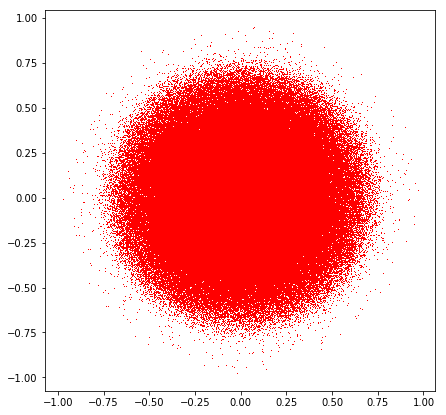

In [68]:
plt.figure(figsize=(7,7))
plt.plot(dat[sel&sel2]['SHAPE_E1'],dat[sel&sel2]['SHAPE_E2'],'r,')

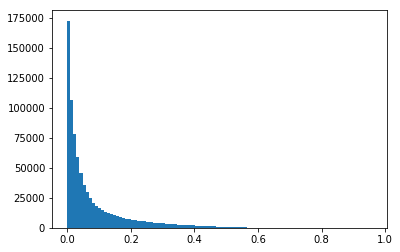

In [71]:
p=plt.hist(dat[sel&sel2]['SHAPE_E1']**2+dat[sel&sel2]['SHAPE_E2']**2,bins=100)

In [72]:
(dat[sel&sel2]['SHAPE_E1']**2+dat[sel&sel2]['SHAPE_E2']**2).max()

0.95709187

In [79]:
fn = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/wise_ebv1000/seed.fits'
dat = fits.getdata(fn)

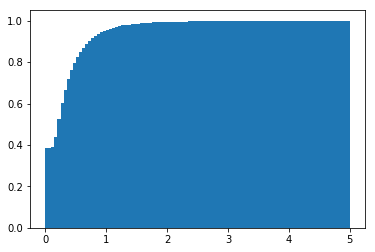

In [80]:
sel = (dat['rhalf']<5)
p=plt.hist(dat[sel]['rhalf'],bins=100,cumulative=True,density=True)